In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install statsmodels==v0.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 12.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
pip install plotly==v4.14.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


# General results

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')

import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
plt.rc('figure',figsize=(17,13))

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS

from statsmodels.tsa.seasonal import seasonal_decompose

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
print(pd.__version__)
print(np.__version__)
print(nltk.__version__)
import wordcloud
print(wordcloud.__version__)
import statsmodels
print(statsmodels.__version__)

1.5.3
1.23.5
3.8.1
1.9.2
0.14.0


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/data/0325_2022_clean.csv')
df2 = pd.read_csv('/content/drive/MyDrive/data/0326_2022_clean.csv')
df3 = pd.read_csv('/content/drive/MyDrive/data/0327_2022_clean.csv')
df4 = pd.read_csv('/content/drive/MyDrive/data/0328_2022_clean.csv')
df5 = pd.read_csv('/content/drive/MyDrive/data/0329_2022_clean.csv')
df6 = pd.read_csv('/content/drive/MyDrive/data/0330_2022_clean.csv')
df7 = pd.read_csv('/content/drive/MyDrive/data/0331_2022_clean.csv')

In [ ]:
f_data = pd.concat([df1,df2,df3,df4,df5,df6,df7])

In [ ]:
f_data.head()

,Unnamed: 0,date,text
0,0,2022-03-25,watchman gang is still early and fresh join ou...
1,1,2022-03-25,ukrainewar russia ukraine war report 24march ...
2,2,2022-03-25,in the short term the only way for europe to b...
3,3,2022-03-25,revmeshoe africanapostles rhemasa pastorxolan...
4,4,2022-03-25,the ukrainian flag will now officially fly ove...


In [ ]:
f_data['date'] = pd.to_datetime(f_data['date'])
f_data = f_data.sort_values(by='date')
f_data = f_data.reset_index().drop(columns=['index'])

In [ ]:
f_data.head()

,Unnamed: 0,date,text
0,0,2022-03-25,watchman gang is still early and fresh join ou...
1,50217,2022-03-25,thank you iuliiamendel for your powerful messa...
2,50216,2022-03-25,hirokotabuchi nytopinion fmanjoo transparency...
3,50215,2022-03-25,karen entertains at movies public freakouts ht...
4,50214,2022-03-25,zelensky presents state awards to sbu employee...


In [ ]:
f_data = f_data.reset_index().drop(columns=['index'])
f_data

,Unnamed: 0,date,text
0,0,2022-03-25,watchman gang is still early and fresh join ou...
1,50217,2022-03-25,thank you iuliiamendel for your powerful messa...
2,50216,2022-03-25,hirokotabuchi nytopinion fmanjoo transparency...
3,50215,2022-03-25,karen entertains at movies public freakouts ht...
4,50214,2022-03-25,zelensky presents state awards to sbu employee...
...,...,...,...
485212,20668,2022-03-31,are ordinary people and world politicians awar...
485213,20669,2022-03-31,six russian soldiers surrender after they trie...
485214,20670,2022-03-31,russiaukraine rubles interesting https t co n...
485215,20642,2022-03-31,kyivindependent one cannot fail but admire th...


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_2, *['date', 'Unnamed: 0', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_3, *['date', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['date', 'Unnamed: 0', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['date', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_8, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_9, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_10, *[[['index', 'Unnamed: 0']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['index', 'Unnamed: 0', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_13, *['date', 'Unnamed: 0', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['date', 'count()', None], **{})
chart

In [ ]:
f_data = f_data.drop_duplicates(subset=['text'])
len(f_data)

426918

In [ ]:
df_mean = f_data.groupby(by='date').mean().reset_index()

fig = make_subplots(rows=1, cols=1)

<ipython-input-14-56761aaf21fe>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
df_mean

,date,Unnamed: 0
0,2022-03-25,37666.855363
1,2022-03-26,36936.209642
2,2022-03-27,34407.132133
3,2022-03-28,39339.696319
4,2022-03-29,37296.531905
5,2022-03-30,35806.495004
6,2022-03-31,33021.880135


In [ ]:


fig.add_trace(go.Scatter(x=df_mean['date'],y=df_mean['Positive Sentiment'],name='Positive Sentiment Trend'),
    row=1, col=1)
fig.add_trace(go.Scatter(x=df_mean['date'],y=df_mean['Negative Sentiment'],name='Negative Sentiment Trend'),
    row=1, col=1)

fig.update_layout(height=600, width=1100, title_text="Daily Avearge Trend",xaxis_title="Time",yaxis_title="Sentiment Score",
               legend=dict(yanchor="top",xanchor="right"),font = dict(size = 15))

fig.update_xaxes(ticktext=["2022-03-25","2022-03-25","2022-03-25", "2022-03-25", "2022-03-25", "2022-03-25","2022-03-25"],
                tickvals=["2022-03-25","2022-03-25","2022-03-25", "2022-03-25", "2022-03-25", "2022-03-25","2022-03-25"],
)

fig.show()

<ipython-input-13-83021e66dbe0>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



KeyError: ignored

In [ ]:
polarity = []
for i in range(len(f_data)):
    if f_data['Compound'].iloc[i] > 0.001:
        if f_data['Positive Sentiment'].iloc[i] > 0.5:
            re = 'Highly Positive'
        else:
            re = 'Positive'
    elif f_data['Compound'].iloc[i] < -0.001:
        if f_data['Negative Sentiment'].iloc[i] > 0.5:
            re = 'Highly Negative'
        else:
            re = 'Negative'
    else:
        re = 'Neutral'
    polarity.append(re)

In [ ]:
f_data['Polarity'] = polarity

<ipython-input-14-9843089bbe59>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
f_data['Polarity'].value_counts()

Positive           398661
Neutral            245976
Negative           204084
Highly Positive      6899
Highly Negative      1508
Name: Polarity, dtype: int64

In [ ]:
df_polarity = f_data['Polarity'].value_counts().to_frame()

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Bar(y=df_polarity['Polarity'],x=df_polarity.index,name='Positive Sentiment Trend',text = df_polarity['Polarity']),
    row=1, col=1)

fig.update_yaxes(title_text="Tweets Counts")
fig.update_xaxes(title_text="Sentiment Polarity")
#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_traces(textposition='outside')
fig.update_layout(height=650, width=900, title_text="Distribution of 5 Polarity Categories",font = dict(size = 15))

In [ ]:
pos = f_data[f_data['Polarity'] == 'Positive']
hpos = f_data[f_data['Polarity'] == 'Highly Positive']
neu = f_data[f_data['Polarity'] == 'Neutral']
neg = f_data[f_data['Polarity'] == 'Negative']
hneg = f_data[f_data['Polarity'] == 'Highly Negative']

In [ ]:
pos_all = pd.concat([pos,hpos]).sort_values(by='date')
neg_all = pd.concat([neg,hneg]).sort_values(by='date')

In [ ]:
pos_mean = pos_all.groupby(by='date').mean().reset_index()
neg_mean = neg_all.groupby(by='date').mean().reset_index()

<ipython-input-19-dc0f6b607630>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-19-dc0f6b607630>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
res_pos = seasonal_decompose(df_mean['Positive Sentiment'], period=12, model='additive', extrapolate_trend='freq')
res_neg = seasonal_decompose(df_mean['Negative Sentiment'], period=12, model='additive', extrapolate_trend='freq')

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=np.arange(0,len(res_pos.trend)), y=res_pos.trend,name='Positive Trend'),
    row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(0,len(res_neg.trend)), y=res_neg.trend,name='Negative Trend'),
    row=1, col=1)

fig.update_layout(height=450, width=750, title_text="Trend of Positive&Negative",legend=dict(yanchor="top",xanchor="right"),font = dict(size = 15))
fig.update_yaxes(title_text="Daily Average Sentiment Score")
fig.update_xaxes(title_text="Time")

fig.update_xaxes(
    ticktext=["2020-12-14","2021-01-03","2021-01-23","2021-02-12","2021-03-04","2021-03-24","2021-04-14",'2021-04-30'],
    tickvals=["0","20","40","60","80","100","121",'137'])

fig.show()

In [ ]:
df_res = pd.DataFrame({'res_pos':res_pos.trend,'res_neg':res_neg.trend})
df_res.to_excel('/content/drive/Shareddrives/Wen_Vaccine_Kaggle/replicate/figure4.xlsx',index=False)

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['amp','covidvaccine','Äôs','Äôt','shit','fuck','vaccine','covid','covid19','covid19vaccine'])

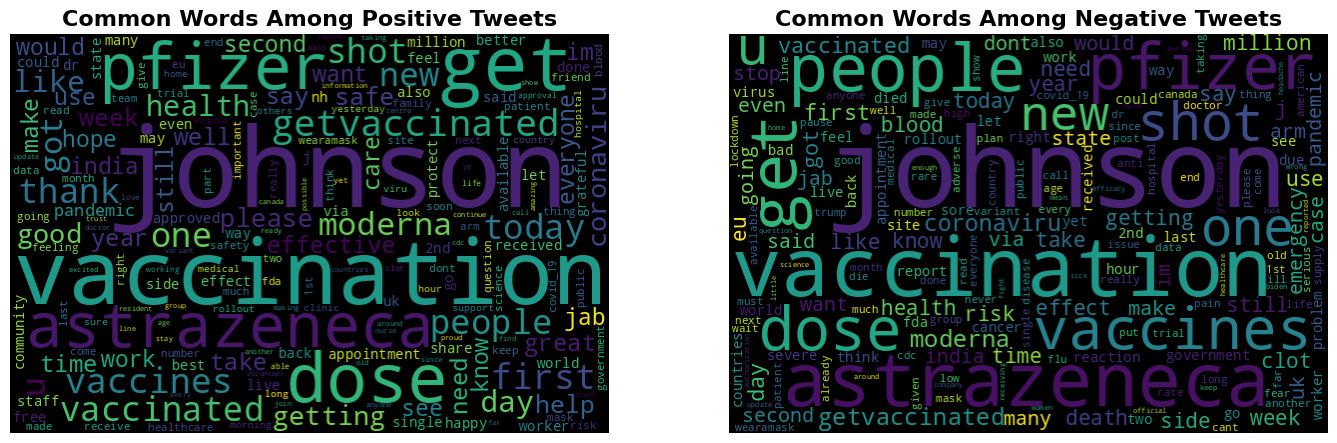

In [ ]:
Positive_text = ' '.join(pos.text)
Negative_text = ' '.join(neg.text)

pwc = WordCloud(stopwords=stop_words,width=600,height=400,collocations = False,random_state=11).generate(Positive_text)
nwc = WordCloud(stopwords=stop_words,width=600,height=400,collocations = False,random_state=11).generate(Negative_text)

plt.subplot(1,2,1)
plt.title('Common Words Among Positive Tweets',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Negative Tweets',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

In [ ]:
pos_wordfreq = pwc.words_
neg_wordfreq = nwc.words_

In [ ]:
df_pos_wordfreq = pd.DataFrame.from_dict(pos_wordfreq, orient='index')
df_neg_wordfreq = pd.DataFrame.from_dict(neg_wordfreq, orient='index')
df_pos_wordfreq.to_excel('/content/drive/Shareddrives/Wen_Vaccine_Kaggle/replicate/pos_wordfreq.xlsx')
df_neg_wordfreq.to_excel('/content/drive/Shareddrives/Wen_Vaccine_Kaggle/replicate/neg_wordfreq.xlsx')

In [ ]:
pos_wordcounts = WordCloud(stopwords=stop_words,width=600,height=400,collocations = False).process_text(Positive_text)
neg_wordcounts = WordCloud(stopwords=stop_words,width=600,height=400,collocations = False).process_text(Negative_text)

In [ ]:
df_pos_wordfreq = pd.DataFrame.from_dict(pos_wordcounts, orient='index')
df_neg_wordfreq = pd.DataFrame.from_dict(neg_wordcounts, orient='index')
df_pos_wordfreq.to_csv('/content/drive/Shareddrives/Wen_Vaccine_Kaggle/replicate/pos_wordcounts.csv')
df_neg_wordfreq.to_csv('/content/drive/Shareddrives/Wen_Vaccine_Kaggle/replicate/neg_wordcounts.csv')

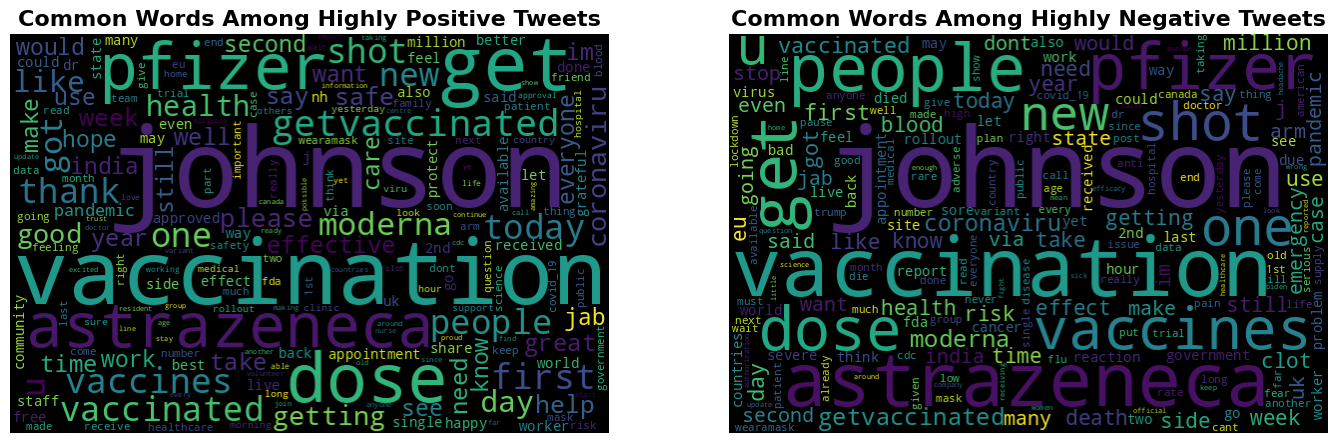

In [ ]:
h_Positive_text = ' '.join(hpos.text)
h_Negative_text = ' '.join(hneg.text)


h_pwc = WordCloud(stopwords=stop_words,width=600,height=400,collocations = False).generate(h_Positive_text)
h_nwc = WordCloud(stopwords=stop_words,width=600,height=400,collocations = False).generate(h_Negative_text)

plt.subplot(1,2,1)
plt.title('Common Words Among Highly Positive Tweets',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Highly Negative Tweets',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

In [ ]:
hpos_wordfreq = h_pwc.words_
hneg_wordfreq = h_nwc.words_

In [ ]:
df_hpos_wordfreq = pd.DataFrame.from_dict(hpos_wordfreq, orient='index')
df_hneg_wordfreq = pd.DataFrame.from_dict(hneg_wordfreq, orient='index')
df_hpos_wordfreq.to_excel('/content/drive/Shareddrives/Wen_Vaccine_Kaggle/replicate/hpos_wordfreq2.xlsx')
df_hneg_wordfreq.to_excel('/content/drive/Shareddrives/Wen_Vaccine_Kaggle/replicate/hneg_wordfreq2.xlsx')

In [ ]:
hpos_wordcounts = WordCloud(stopwords=stop_words,width=600,height=400,collocations = False).process_text(h_Positive_text)
hneg_wordcounts = WordCloud(stopwords=stop_words,width=600,height=400,collocations = False).process_text(h_Negative_text)

In [ ]:
df_hpos_wordcounts = pd.DataFrame.from_dict(hpos_wordcounts, orient='index')
df_hneg_wordcounts = pd.DataFrame.from_dict(hneg_wordcounts, orient='index')
df_hpos_wordcounts.to_csv('/content/drive/Shareddrives/Wen_Vaccine_Kaggle/replicate/hpos_wordcounts2.csv')
df_hneg_wordcounts.to_csv('/content/drive/Shareddrives/Wen_Vaccine_Kaggle/replicate/hneg_wordcounts2.csv')

In [ ]:
f_data['month'] = pd.DatetimeIndex(f_data['date']).month
f_12 = f_data[f_data['month'] == 12]
f_1 = f_data[f_data['month'] == 1]
f_2 = f_data[f_data['month'] == 2]
f_3 = f_data[f_data['month'] == 3]
f_4 = f_data[f_data['month'] == 4]

<ipython-input-34-1c5c32761e0a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_month = pd.DataFrame(columns = f_1['Polarity'].value_counts().index.tolist(),
                        data = [f_12['Polarity'].value_counts().values,
                                f_1['Polarity'].value_counts().values,
                                f_2['Polarity'].value_counts().values,
                                f_3['Polarity'].value_counts().values,
                                f_4['Polarity'].value_counts().values],
                       index = ['December','January','February','March','April'])

In [ ]:
df_month

,Positive,Neutral,Negative,Highly Positive,Highly Negative
December,42899,21771,19555,1008,167
January,79794,41820,39411,1294,319
February,65955,34532,30174,943,197
March,110428,70099,53906,1936,420
April,99585,77754,61038,1718,405


In [ ]:
neg_dis_byweek_main = pd.read_excel('/content/drive/Shareddrives/Wen_Vaccine_Kaggle/replicate/neg_dis_byweek_1001.xlsx')

In [ ]:
#dis = neg_dis_byweek.set_index('Topic')
dis = neg_dis_byweek_main.iloc[:,1:]
import plotly.express as px
fig = px.imshow(dis, y=['NEG_05','NEG_00','NEG_06','NEG_04','NEG_07'],aspect='auto')
fig.update_layout(height=700, width=600,title='Main Negative Topics Evolution by Week')
fig.update_xaxes(tickangle=30)
fig.show()